In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import seaborn as sn

In [3]:
df=pd.read_csv(r"binary.csv")
df.head()

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [5]:
df.shape

(400, 4)

In [ ]:
df.isnull().sum()

In [7]:
x=df[["gre","gpa","rank"]]
y=df["admit"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,random_state=42)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 3)

(80, 3)

(320,)

(80,)

In [40]:
model=LogisticRegression(solver='liblinear',max_iter=1000)

In [41]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [42]:
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",conf_mat)
Accuracy_Score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ",Accuracy_Score)
print("ACcuracy in %: ", Accuracy_Score*100, "%")

Confusion Matrix:  [[52  1]
 [24  3]]
Accuracy Score:  0.6875
ACcuracy in %:  68.75 %


<Axes: xlabel='Predicted', ylabel='Actual'>

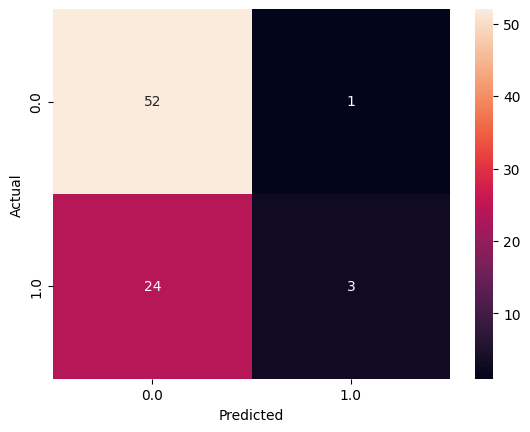

In [43]:
conf_mat=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(conf_mat,annot=True)